# Simple RNN(Recurrent Neural Networks)

<hr>

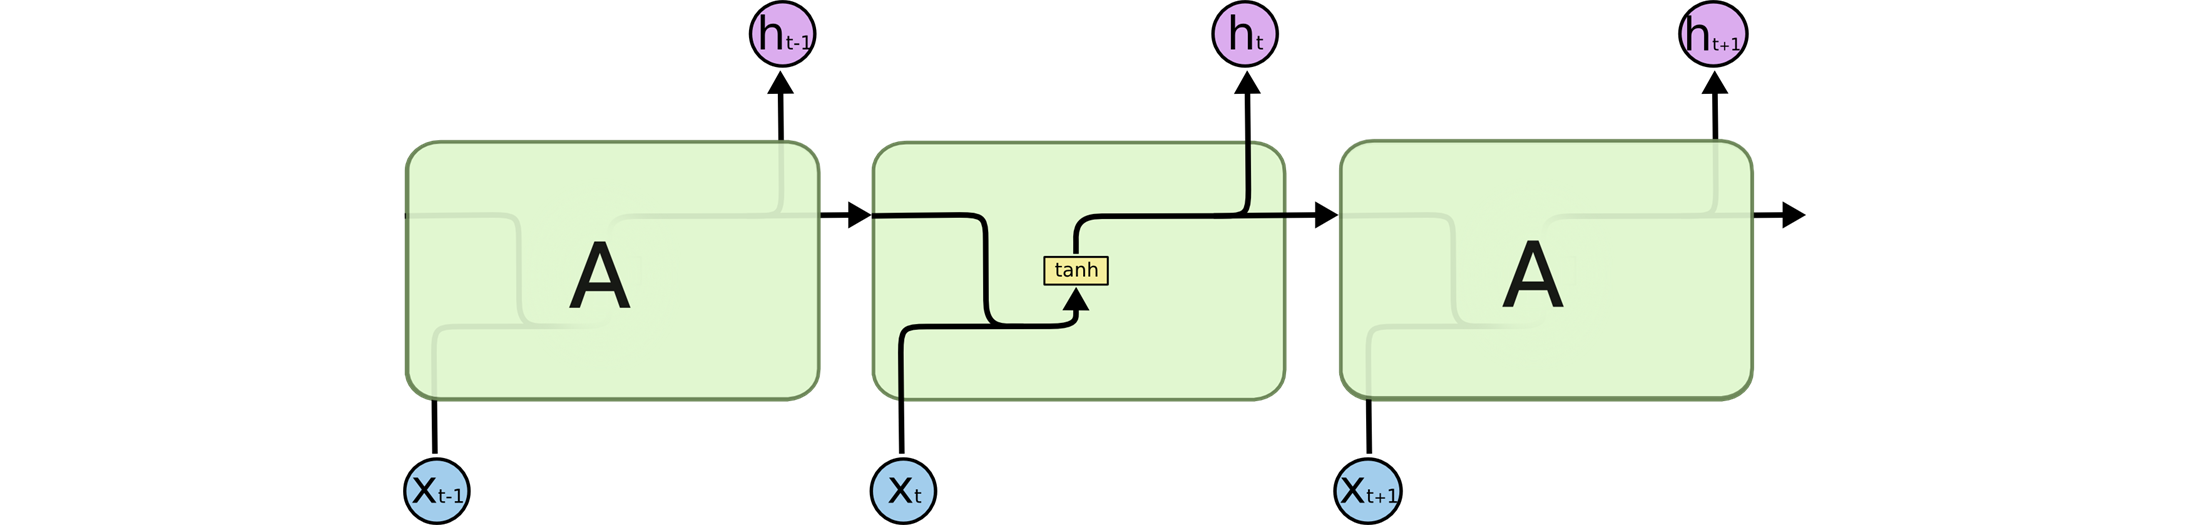

### 步骤
<ol type="1">
    <li>加载数据集（50K IMDB电影评论）</li>
    <li>拆分数据集</li>
    <li>构建模型架构</li>
    <li>训练和测试</li>
</ol>

<hr>
<i>导入所有库</i>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers


### 加载数据集
<ul type="1">
<li> file_path = 'IMDB Dataset.csv'：指定要加载的CSV文件的路径，这里是名为“IMDB Dataset.csv”的文件。</li>
<li>  df = pd.read_csv(file_path)：使用pandas库中的read_csv函数读取CSV文件，并将数据存储在名为df的数据框中。</li>
<li>  vocabulary = 10000：定义字典中的独特单词数量为10000个。</li>
<li>  embedding_dim = 32：定义嵌入层的维度为32。</li>
<li>  word_num = 500：定义输入序列的长度为500。</li>
<li>  state_dim = 32：定义RNN（循环神经网络）状态的维度为32。</li>
<li>  epochs = 3：定义模型训练的轮数为3。</li>
<li> print(df.iloc[0,0])：打印数据框df中第一行第一列的内容。</li>
</ul>

In [ ]:

# Load the CSV file
file_path = 'IMDB Dataset.csv'
df = pd.read_csv(file_path)

# Parameters
vocabulary = 10000  # unique words in the dictionary
embedding_dim = 32
word_num = 500  # sequence length
state_dim = 32
epochs = 3

print(df.iloc[0,0])


### 拆分数据集
<ul>

<li>tokenizer = Tokenizer(num_words=vocabulary)：创建一个Tokenizer对象，指定词汇表的最大词数为vocabulary（即10000）。</li>
<li>tokenizer.fit_on_texts(df['review'])：用数据框df中的'review'列（包含评论文本）训练Tokenizer，构建词汇表。</li>
<li>sequences = tokenizer.texts_to_sequences(df['review'])：将评论文本转换为对应的整数序列，整数对应词汇表中的索引。</li>
<li>x_data = pad_sequences(sequences, maxlen=word_num)：将整数序列填充或截断到固定长度word_num（即500），不足的部分用零填充，超出的部分截断。</li>
<li>y_data = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values：将情感标签转换为二进制值，正面情感为1，负面情感为0。</li>
<li>x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)：将数据集按80%的训练集和20%的测试集进行拆分，random_state=42确保拆分的可重复性。</li>
<li>print(x_train[0])：打印第一个训练样本的输入序列。</li>
<li>print(y_train[0])：打印第一个训练样本的标签。</li>

</ul>

In [ ]:

# Prepare the data
tokenizer = Tokenizer(num_words=vocabulary)
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
x_data = pad_sequences(sequences, maxlen=word_num)
y_data = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print(x_train[0])
print(y_train[0])


### 构建模型架构

<ul>
<li></li>
<li>model = Sequential()：创建一个顺序模型（Sequential model），用于按顺序构建神经网络层。</li>
<li>model.add(Embedding(vocabulary, embedding_dim, input_length=word_num))：添加嵌入层，将输入的整数索引（单词）转换为固定维度（embedding_dim为32）的向量表示。词汇表大小为vocabulary（10000），输入序列长度为word_num（500）。</li>
<li>model.add(SimpleRNN(state_dim, return_sequences=False))：添加一个简单的RNN层，输出的维度为state_dim（32），return_sequences=False表示只返回最后一个输出而不是整个序列。</li>
<li>model.add(Dense(1, activation='sigmoid'))：添加一个全连接层（Dense layer），输出单个节点，使用sigmoid激活函数将输出转换为0到1之间的概率值，用于二元分类。</li>
<li>model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])：编译模型，使用RMSprop优化器（学习率为0.001），损失函数为二元交叉熵，评估指标为准确率。</li>
<li>history = model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test))：训练模型，使用训练数据（x_train和y_train），训练轮数为epochs（3轮），批量大小为32，同时使用测试数据（x_test和y_test）进行验证。训练过程中会记录历史数据（history）。</li>


</ul>

In [ ]:

# Build the model
model = Sequential()
model.add(Embedding(vocabulary, embedding_dim, input_length=word_num))
model.add(SimpleRNN(state_dim, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test))



print(model.summary())：打印模型的摘要信息，包括每一层的名称、输出形状和参数数量。这有助于检查模型的结构和参数数量。<br>
model.save("models/simpleRNN.keras")：将训练好的模型保存到指定的路径（"models/simpleRNN.keras"）。这样可以在以后加载并使用该模型，而不需要重新训练。

In [ ]:
print(model.summary())
model.save("models/simpleRNN.keras")

### 测试

<ul>


<li>loss_and_acc = model.evaluate(x_test, y_test)：使用测试数据（x_test 和 y_test）评估模型的性能，返回损失值和准确率。evaluate函数会计算模型在测试数据上的损失（loss）和评估指标（acc）。</li>
<li>print('loss = ' + str(loss_and_acc[0]))：打印模型在测试集上的损失值。</li>
<li>print('acc = ' + str(loss_and_acc[1]))：打印模型在测试集上的准确率。</li>


</ul>

In [ ]:

# Evaluate the model
loss_and_acc = model.evaluate(x_test, y_test)
print('loss = ' + str(loss_and_acc[0]))
print('acc = ' + str(loss_and_acc[1]))


## Loss（损失）
loss 是损失函数的值，用于衡量模型在训练集或测试集上的预测与实际结果之间的差异。损失值越小，模型的预测结果越接近实际结果。常用的损失函数包括：<br>

$$ \text{Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

二元交叉熵（binary cross-entropy）：用于二分类问题，衡量模型预测的概率分布与实际分布之间的差异。<br>
均方误差（mean squared error）：用于回归问题，衡量模型预测值与实际值之间的平方差。<br>
在代码中，使用了 binary_crossentropy 作为损失函数，因为这是一个二分类问题（正面情感和负面情感）。<br>

## Acc（准确率）
acc 是准确率（accuracy），用于衡量模型预测正确的样本占总样本的比例。准确率越高，模型的分类效果越好。准确率的计算公式为：<br>
$$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

对于分类问题，准确率是一个常用的评估指标，它直观地反映了模型的预测效果。